Our phantom directories are ['1742413505']


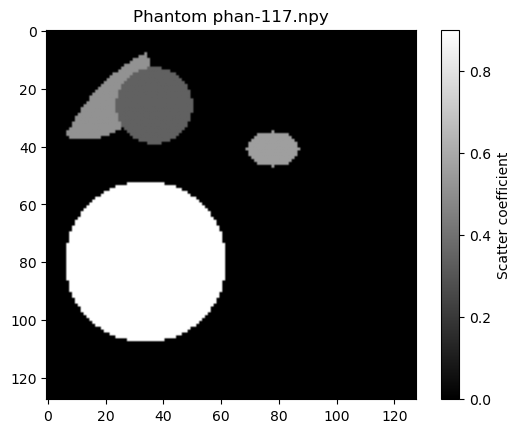

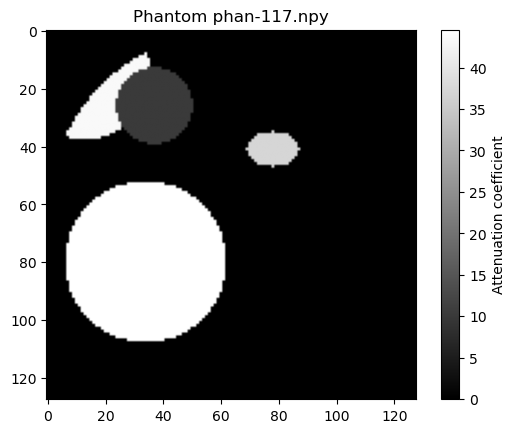

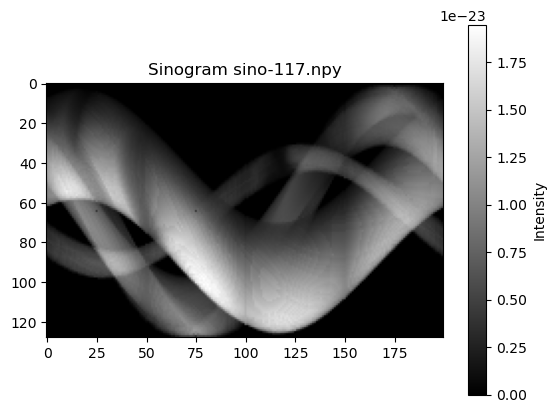

In [40]:
#@title Let's use this notebook to analyse the data we're generating

import numpy as np
import matplotlib.pyplot as plt
import os

# Get all directories within ../data folder
data_dir = '../data'
dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Our phantom directories are {dirs}")

# Get all files within a directory
def get_files_in_dir(dir_name):
    return [f for f in os.listdir(os.path.join(data_dir, dir_name)) if os.path.isfile(os.path.join(data_dir, dir_name, f))]

# Select random directory, then a random file beginning with "phan"
dir_name = np.random.choice(dirs)
files = get_files_in_dir(dir_name)
phan_file_name = np.random.choice([f for f in files if f.startswith('phan')])
sino_file_name = f"sino-{phan_file_name.split("-")[1].split(".")[0]}.npy"

# Load the data
phan_data = np.load(os.path.join(data_dir, dir_name, phan_file_name))
# Display the data
plt.imshow(phan_data[0], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Scatter coefficient")
plt.show()
plt.imshow(phan_data[1], cmap='gray')
plt.title(f"Phantom {phan_file_name}")
plt.colorbar(label="Attenuation coefficient")
plt.show()

# Load the data
sino_data = np.load(os.path.join(data_dir, dir_name, sino_file_name))
# Display the data
plt.imshow(np.sum(sino_data, axis=2), cmap='gray')
plt.title(f"Sinogram {sino_file_name}")
plt.colorbar(label="Intensity")
plt.show()
